In [4]:
#
#
#

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

def read_data_file(f):
    data = pd.read_csv(f, 
                       sep=' ', 
                       header=0, names=['time','millis','x','y','z','h','c','f'],
                       dtype = {'time': np.float64 },
                       on_bad_lines='skip',
                       #error_bad_lines=False,
                       na_values='Timeout...',
                    )
    # drop nan(s)
    data.dropna(inplace = True)
    return data

def read_data():
    return read_data_file(r"\\readyshare\USB_Storage\downloads\dump\nanoget.log")

def read_data2():
    return read_data_file(r"\\readyshare\USB_Storage\downloads\dump\nanoget2.log")

def read_data_today():
    data = read_data()
    last24 = time.time() - 24 * 3600
    data = data[data.time > last24]
    return data

def read_data2_today():
    data = read_data2()
    last24 = time.time() - 24 * 3600
    data = data[data.time > last24]
    return data
def plot_temperature(data):
    plt.rcParams['timezone'] = 'EST'

    # make data
    x = data.time.to_numpy()
    x = np.array(x, dtype='datetime64[s]')
    y = data.c.to_numpy() / 100
    h = data.h.to_numpy() / 100

    color = 'tab:orange'

    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches((18,6))
    ax.grid()
    ax.set_ylabel('Temperature (C)', color=color)
    ax.plot(x, y, linewidth=2.0, color=color)
    plt.show()
    
def plot_humidity(data):
    plt.rcParams['timezone'] = 'EST'

    # make data
    x = data.time.to_numpy()
    x = np.array(x, dtype='datetime64[s]')
    y = data.c.to_numpy() / 100
    h = data.h.to_numpy() / 100

    color = 'tab:blue'

    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches((18,6))
    ax.grid()
    ax.set_ylabel('Humidity (%)', color=color)
    ax.plot(x, h, linewidth=2.0, color=color)
    plt.show()
    
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def plot_two(data):
    plt.rcParams['timezone'] = 'EST'

    x = data.time.to_numpy()
    x = np.array(x, dtype='datetime64[s]')
    c = data.c.to_numpy() / 100
    h = data.h.to_numpy() / 100

    w =15
    assert(w > 0)
    if w < len(c):
        c = moving_average(c, w)
        h = moving_average(h, w)
        x = x[w-1:]
    else:
        print("Not enough data to apply average")
    
    fig, ax1 = plt.subplots(figsize=(18, 6))

    color = 'tab:red'
    ax1.set_xlabel('date/time')
    ax1.set_ylabel('Temperature (C)', color=color)
    ax1.plot(x, c, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, h, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    
# define a class
class Station:
    def __init__(self, f=r"\\readyshare\USB_Storage\downloads\dump\nanoget.log"):
        self.filename = f
        self.data = read_data_file(self.filename)
    
    def read_data_today(self):
        last24 = time.time() - 24 * 3600
        d = self.data[self.data.time > last24]
        return d
    
    def plot_temperature(self):
        plot_temperature(self.data)
        
    def plot_humidity(self):
        plot_humidity(self.data)
        
    def plot_two(self):
        plot_two(self.read_data_today())

In [ ]:
data = read_data_today()
print(data.shape)
plot_two(data)

data2 = read_data2_today()
print(data2.shape)
plot_two(data2)

In [ ]:
data = read_data()
plot_temperature(data)
plot_humidity(data)

data2 = read_data2()
plot_temperature(data2)
plot_humidity(data2)

In [4]:
print(np.average(data.h)/100, np.average(data.c)/100)
print(np.average(data2.h)/100, np.average(data2.c)/100)

43.011576988340906 8.738781542503695
39.50811627029068 19.504975462438654


In [5]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

d = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

print(moving_average(d,4))
print(d.shape)
print(moving_average(d,4).shape)

[ 8.    9.25 13.5  18.   18.5  18.5  17.   15.   14.  ]
(12,)
(9,)


\\readyshare\USB_Storage\downloads\dump\nanoget.log
\\readyshare\USB_Storage\downloads\dump\nanoget2.log


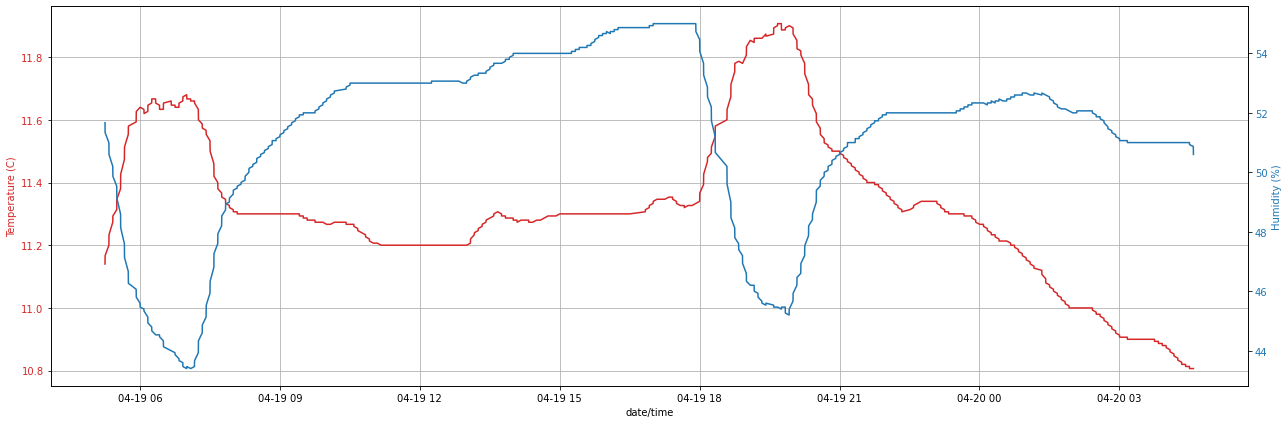

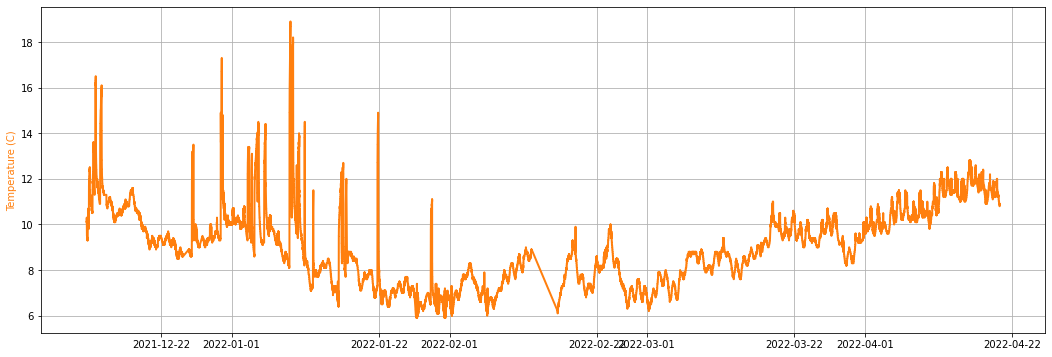

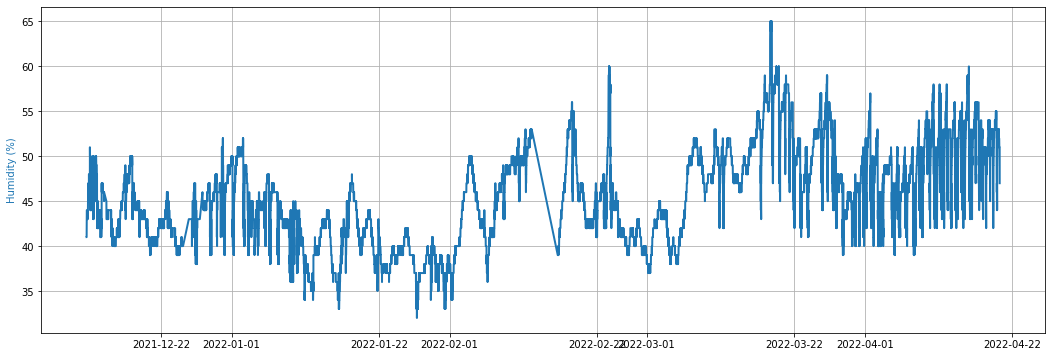

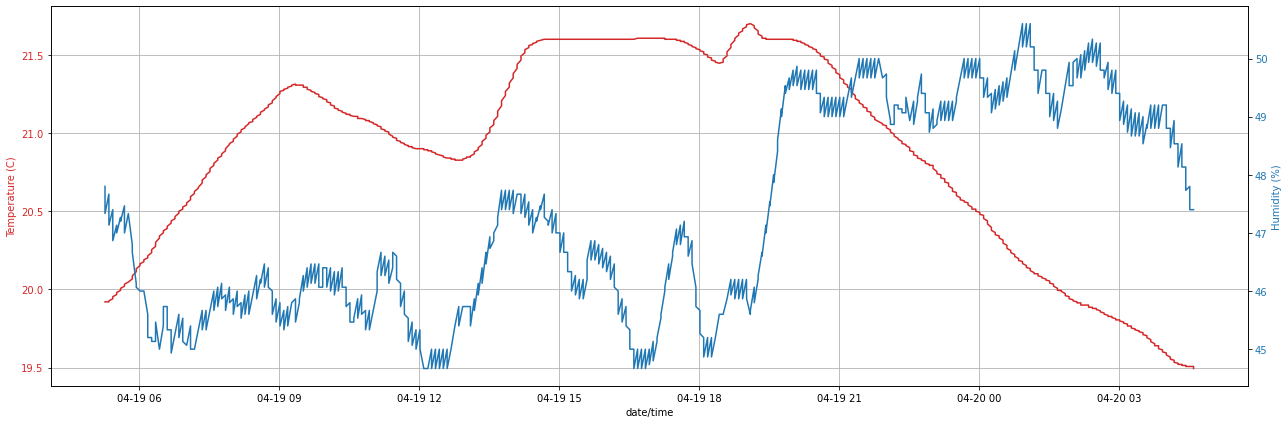

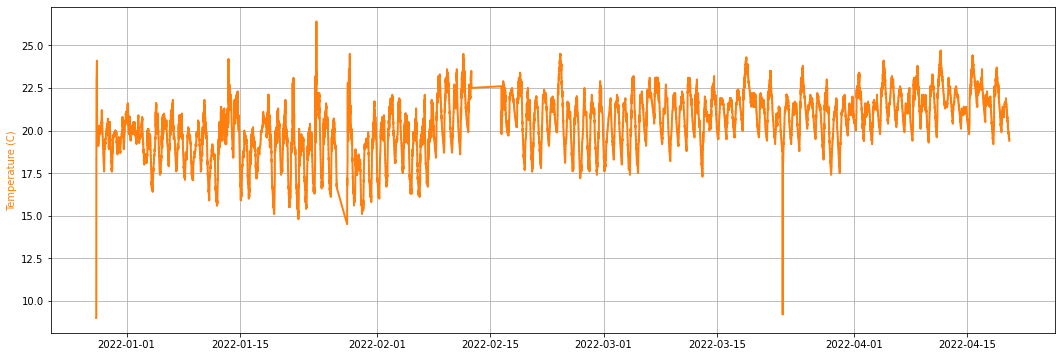

In [5]:
s = Station(r"\\readyshare\USB_Storage\downloads\dump\nanoget.log")
s2 = Station(r"\\readyshare\USB_Storage\downloads\dump\nanoget2.log")

print(s.filename)
print(s2.filename)

s.plot_two()
s.plot_temperature()
s.plot_humidity()

s2.plot_two()
s2.plot_temperature()